In [12]:
#!pip install pyramid-arima
import warnings
warnings.filterwarnings("ignore")

In [30]:
from pyramid.arima import auto_arima
import numpy as np

import matplotlib.pyplot as plt

In [10]:
# this is a dataset from R
wineind = np.array([
    # Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct    Nov    Dec
    15136, 16733, 20016, 17708, 18019, 19227, 22893, 23739, 21133, 22591, 26786, 29740, 
    15028, 17977, 20008, 21354, 19498, 22125, 25817, 28779, 20960, 22254, 27392, 29945, 
    16933, 17892, 20533, 23569, 22417, 22084, 26580, 27454, 24081, 23451, 28991, 31386, 
    16896, 20045, 23471, 21747, 25621, 23859, 25500, 30998, 24475, 23145, 29701, 34365, 
    17556, 22077, 25702, 22214, 26886, 23191, 27831, 35406, 23195, 25110, 30009, 36242, 
    18450, 21845, 26488, 22394, 28057, 25451, 24872, 33424, 24052, 28449, 33533, 37351, 
    19969, 21701, 26249, 24493, 24603, 26485, 30723, 34569, 26689, 26157, 32064, 38870, 
    21337, 19419, 23166, 28286, 24570, 24001, 33151, 24878, 26804, 28967, 33311, 40226, 
    20504, 23060, 23562, 27562, 23940, 24584, 34303, 25517, 23494, 29095, 32903, 34379, 
    16991, 21109, 23740, 25552, 21752, 20294, 29009, 25500, 24166, 26960, 31222, 38641, 
    14672, 17543, 25453, 32683, 22449, 22316, 27595, 25451, 25421, 25288, 32568, 35110, 
    16052, 22146, 21198, 19543, 22084, 23816, 29961, 26773, 26635, 26972, 30207, 38687, 
    16974, 21697, 24179, 23757, 25013, 24019, 30345, 24488, 25156, 25650, 30923, 37240, 
    17466, 19463, 24352, 26805, 25236, 24735, 29356, 31234, 22724, 28496, 32857, 37198, 
    13652, 22784, 23565, 26323, 23779, 27549, 29660, 23356]
).astype(np.float64)

In [13]:
from pyramid.arima import ARIMA

fit = ARIMA(order=(1, 1, 1), seasonal_order=(0, 1, 1, 12)).fit(y=wineind)


In [14]:
fit = ARIMA(order=(1, 1, 1), seasonal_order=None).fit(y=wineind)

In [15]:
stepwise_fit = auto_arima(wineind, start_p=1, start_q=1, max_p=3, max_q=3, m=12,
                          start_P=0, seasonal=True, d=1, D=1, trace=True,
                          error_action='ignore',  # don't want to know if an order does not work
                          suppress_warnings=True,  # don't want convergence warnings
                          stepwise=True)  # set to stepwise

stepwise_fit.summary()

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=3066.760, BIC=3082.229, Fit time=1.409 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=3133.376, BIC=3139.564, Fit time=0.041 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=3099.734, BIC=3112.109, Fit time=0.377 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=3066.930, BIC=3079.305, Fit time=0.276 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=3067.548, BIC=3086.110, Fit time=1.414 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=3088.088, BIC=3100.463, Fit time=0.289 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=3068.000, BIC=3086.563, Fit time=2.739 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=3068.915, BIC=3090.571, Fit time=6.898 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=3067.447, BIC=3086.010, Fit time=0.837 seconds
Fit ARIMA: order=(1, 1, 0) s

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  176
Model:             SARIMAX(1, 1, 2)x(0, 1, 1, 12)   Log Likelihood               -1527.371
Date:                            Sun, 19 Aug 2018   AIC                           3066.742
Time:                                    18:00:35   BIC                           3085.305
Sample:                                         0   HQIC                          3074.278
                                            - 176                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   -100.7331     72.197     -1.395      0.163    -242.236      40.770
ar.L1         -0.5123      0.390     -1.312      0.189      -1.277       0.253
ma.L1         -0.0806      0.404     -0.200      0.842      -0.872       0.711
ma.L2         -0.4430      0.224     -1.978      0.048      -0.882      -0.004
ma.S.L12      -0.4025      0.054     -7.448      0.000      -0.508      -0.297
sigma2      7.663e+06    7.3e+05     10.495      0.000    6.23e+06    9.09e+06
===================================================================================
Ljung-Box (Q):                       48.70   Jarque-Bera (JB):                21.57
Prob(Q):                              0.16   Prob(JB):                         0.00
Heteroskedasticity (H):               1.18   Skew:                            -0.61
Prob(H) (two-sided):                  0.54   Kurtosis:                         4.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.14e+14. Standard errors may be unstable.
"""

In [16]:
rs_fit = auto_arima(wineind, start_p=1, start_q=1, max_p=3, max_q=3, m=12,
                    start_P=0, seasonal=True, n_jobs=-1, d=1, D=1, trace=True,
                    error_action='ignore',  # don't want to know if an order does not work
                    suppress_warnings=True,  # don't want convergence warnings
                    stepwise=False, random=True, random_state=42,  # we can fit a random search (not exhaustive)
                    n_fits=25)

rs_fit.summary()

Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=3068.460, BIC=3090.116, Fit time=9.170 seconds
Fit ARIMA: order=(3, 1, 3) seasonal_order=(0, 1, 1, 12); AIC=3072.615, BIC=3100.459, Fit time=5.730 seconds
Fit ARIMA: order=(3, 1, 3) seasonal_order=(0, 1, 2, 12); AIC=3073.565, BIC=3104.503, Fit time=28.878 seconds
Fit ARIMA: order=(1, 1, 3) seasonal_order=(0, 1, 1, 12); AIC=3068.810, BIC=3090.467, Fit time=3.249 seconds
Fit ARIMA: order=(3, 1, 2) seasonal_order=(1, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 1, 2, 12); AIC=3070.267, BIC=3095.017, Fit time=25.942 seconds
Fit ARIMA: order=(1, 1, 3) seasonal_order=(2, 1, 2, 12); AIC=3072.192, BIC=3103.129, Fit time=50.121 seconds


KeyboardInterrupt: 

# Shampoo dataset

In [20]:
import pandas as pd

def parser(x):
    # fake the year numbers
    return pd.datetime.strptime('200'+x, '%Y-%m')

series = pd.read_csv('shampoo-sales.csv', 
                  header=0, # wor #0 is the header row
                  quotechar='"',
                 parse_dates=[0],
                 index_col=0, # date column is index
                 squeeze=True, # return series if only 1 column
                 date_parser=parser)

In [39]:
series.tail()

Month
2003-08-01    407.6
2003-09-01    682.0
2003-10-01    475.3
2003-11-01    581.3
2003-12-01    646.9
Name: Sales of shampoo over a three year period, dtype: float64

In [22]:
stepwise_fit = auto_arima(series, start_p=1, start_q=1, max_p=6, max_q=2, m=12,
                          start_P=0, seasonal=False, d=1, D=1, trace=True,
                          error_action='ignore',  # don't want to know if an order does not work
                          suppress_warnings=True,  # don't want convergence warnings
                          stepwise=True)  # set to stepwise

stepwise_fit.summary()

Fit ARIMA: order=(1, 1, 1); AIC=402.467, BIC=408.688, Fit time=0.086 seconds
Fit ARIMA: order=(0, 1, 0); AIC=430.873, BIC=433.984, Fit time=0.004 seconds
Fit ARIMA: order=(1, 1, 0); AIC=406.022, BIC=410.688, Fit time=0.043 seconds
Fit ARIMA: order=(0, 1, 1); AIC=409.013, BIC=413.679, Fit time=0.033 seconds
Fit ARIMA: order=(2, 1, 1); AIC=404.286, BIC=412.063, Fit time=0.091 seconds
Fit ARIMA: order=(1, 1, 2); AIC=401.525, BIC=409.302, Fit time=0.194 seconds
Fit ARIMA: order=(0, 1, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 0.476 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                   35
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -195.762
Method:                       css-mle   S.D. of innovations             59.410
Date:                Sun, 19 Aug 2018   AIC                            401.525
Time:                        18:03:44   BIC                            409.302
Sample:                             1   HQIC                           404.209
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.2823      6.239      1.648      0.109      -1.945      22.510
ar.L1.D.y      0.1019      0.207      0.492      0.626      -0.304       0.508
ma.L1.D.y     -1.4369      0.477     -3.013      0.005      -2.372      -0.502
ma.L2.D.y      1.0000      0.653      1.532      0.136      -0.279       2.279
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            9.8120           +0.0000j            9.8120            0.0000
MA.1            0.7185           -0.6956j            1.0000           -0.1224
MA.2            0.7185           +0.6956j            1.0000            0.1224
-----------------------------------------------------------------------------
"""

In [45]:
newrange = pd.date_range(start="2004-01-01", periods=24, freq='MS')

In [51]:
predictions, cis = stepwise_fit.predict(n_periods=24, return_conf_int=True)
predictions = pd.DataFrame(predictions, index=newrange)
cis = pd.DataFrame(cis, index=newrange)

In [49]:
predictions.head()

,0
2004-01-01,605.745746
2004-02-01,611.013126
2004-03-01,620.784370
2004-04-01,631.014628
2004-05-01,641.291668


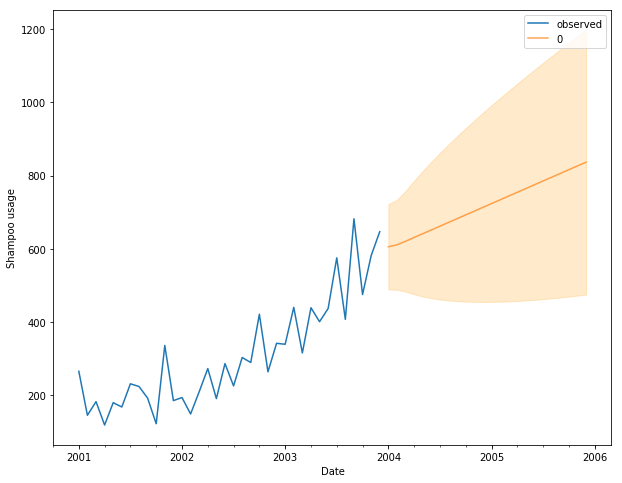

In [53]:
# from 1990 onwards
ax = series['2001-01-01':].plot(label='observed', figsize=(10, 8))

# add predicted values
predictions.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

# add confidence intervals
ax.fill_between(cis.index,
                cis.iloc[:, 0],
                cis.iloc[:, 1], color='#ff9900', alpha=.2)

# set graph info (axes and legend)
ax.set_xlabel('Date')
ax.set_ylabel('Shampoo usage')
plt.legend()

# render!
plt.show()